In [3]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;

taxis=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\nyc_taxi_trip_duration.csv')


In [4]:
taxis['pickup_datetime']=pd.to_datetime(taxis.pickup_datetime)
taxis.dropoff_datetime=pd.to_datetime(taxis.dropoff_datetime)

In [5]:
taxis.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
import datetime
nombres_dias=['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

taxis['Nombre_dia']=taxis.pickup_datetime.apply(lambda x: nombres_dias[datetime.date.weekday(x)])
taxis['Numero_dia']=taxis.pickup_datetime.apply(lambda x: datetime.date.weekday(x))
taxis['Hora_viaje']=taxis.pickup_datetime.apply(lambda x: x.hour)


In [7]:
def intervalo_dia(x):
    if x>=6 and x<12:
        return 'Mañana'
    elif x>=12 and x<=17:
        return 'Tarde'
    elif x>=18 and x<24:
        return 'Noche'
    elif x>=0 and x<6:
        return 'Madrugada'

taxis['Intervalo']=taxis.Hora_viaje.apply(intervalo_dia)

        
    
    

Text(0, 0.5, 'Cuenta')

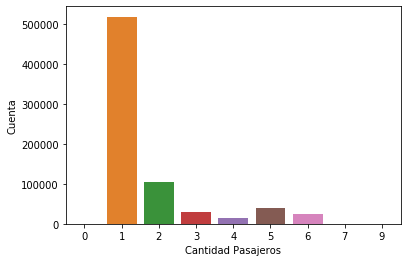

In [8]:
sns.countplot(taxis.passenger_count)
plt.xlabel('Cantidad Pasajeros')
plt.ylabel('Cuenta')

##### De la gráfica anterior se observa que la mayoría de los viajes se hace sólo con un pasajero


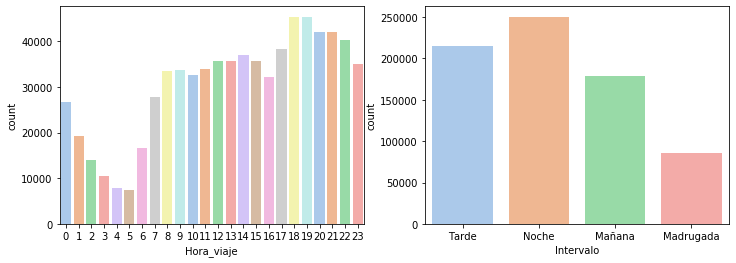

In [9]:
fig,ax=plt.subplots(1,2,figsize=(12,4))

sns.countplot(taxis.Hora_viaje,ax=ax[0],palette='pastel')
sns.countplot(taxis.Intervalo,ax=ax[1],palette='pastel')

##### Del par de gráficas anteriores se puede concluir que la mayoría de los viajes se realizan en la horas de la noche, mientras que el número de viajes desciende en las horas de la madrugada

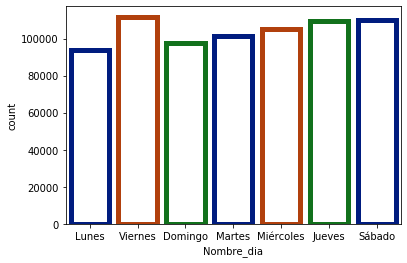

In [10]:
sns.countplot(taxis.Nombre_dia,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

##### El día con mayor número de viajes en taxi es el viernes, seguido por el sábado y el jueves respectivamente.


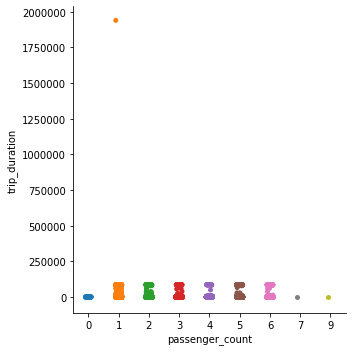

In [11]:

sns.catplot(x='passenger_count',y='trip_duration',data=taxis,kind='strip')

##### Se observa un outlier en la gráfica


In [12]:
taxis['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
312992          1
398887          1
622664          1
323299          1
296874          1
Name: trip_duration, Length: 729322, dtype: int64

In [13]:
taxis=taxis.loc[taxis['trip_duration']!=1939736,:]
taxis=taxis.loc[taxis['passenger_count'].isin([1,2,3,4,5,6]),:]


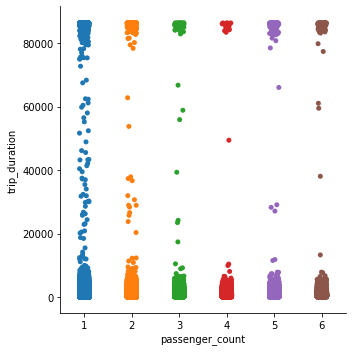

In [14]:
sns.catplot(x='passenger_count',y='trip_duration',data=taxis,kind='strip')

##### No se observa una relación entre la duración del viaje con el número de pasajeros 

Text(0, 0.5, 'Duración media en segundos')

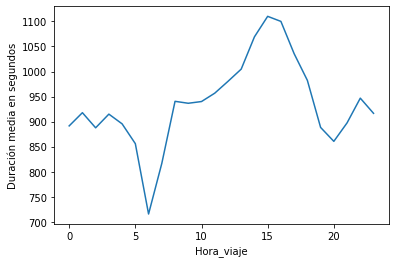

In [15]:
taxis.groupby('Hora_viaje')['trip_duration'].mean().plot()
plt.ylabel('Duración media en segundos')

##### La gráfica anterior representa la duración media de los viajes con respecto a la hora en que fueron tomados. Los viajes más largos suceden en horas de la tarde producto posiblemente de los trancones que suceden a estas horas. Por otro lado, los viajes de menor duración se presentan en horas de la madrugada donde las calles se encuentran mas vacías.

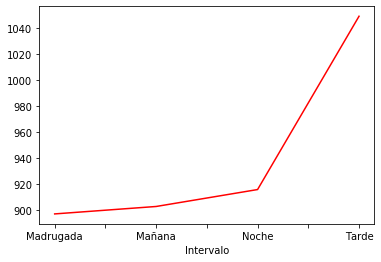

In [16]:
taxis.groupby('Intervalo')['trip_duration'].mean().plot(c='red')

###### La gráfica anterior es otra forma de corroborar lo anteriormente descrito


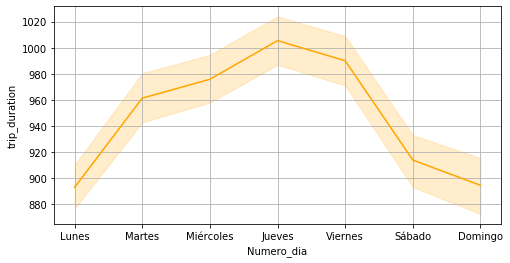

In [17]:
fig,ax=plt.subplots(figsize=(8,4))

sns.lineplot(x='Numero_dia',y='trip_duration',data=taxis,ax=ax,color='orange',markers=True)
ax.set_xticklabels(['','Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo'])
plt.grid()

###### El diá con los viajes más largos en promedio es el jueves, seguido por el día viernes

In [18]:
taxis['Mes']=taxis.pickup_datetime.apply(lambda x: x.month)


[Text(0, 0, ''),
 Text(0, 0, 'Enero'),
 Text(0, 0, 'Febrero'),
 Text(0, 0, 'Marzo'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Mayo'),
 Text(0, 0, 'Junio')]

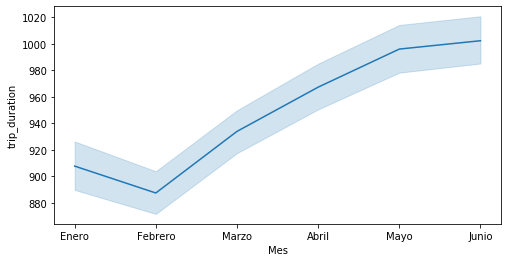

In [19]:
nombres_mes=["",'Enero','Febrero','Marzo','Abril','Mayo','Junio']
fig,ax=plt.subplots(figsize=(8,4))
sns.lineplot(x='Mes',y='trip_duration',data=taxis,ax=ax)
ax.set_xticklabels(nombres_mes)


#####  Se observa una tendencia creciente en la duración de los viajes a partir del mes de febrero hasta el mes de junio donde se obtienen los últimos registros